In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
def read_csv_files():
    data = []
    for root, dirs, files in os.walk('results'):
        for file in files:
            if file.endswith("locust_results_stats.csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                parts = root.split(os.sep)
                if len(parts) >= 3:
                    environment = parts[-3]
                    cache_status = parts[-2]
                    user_count = parts[-1]
                    df['Ambiente'] = environment
                    df['StatusCache'] = cache_status
                    df['ContagemUsuarios'] = user_count
                    data.append(df)
                else:
                    print(f"Pular arquivo {file_path} devido à estrutura de caminho inesperada.")
    return pd.concat(data, ignore_index=True)

In [88]:
df = read_csv_files()

python_cache_data = df[(df['Ambiente'] == 'python-api') & (df['StatusCache'] == 'cache')]
python_no_cache_data = df[(df['Ambiente'] == 'python-api') & (df['StatusCache'] == 'no-cache')]
ruby_cache_data = df[(df['Ambiente'] == 'ruby-api') & (df['StatusCache'] == 'cache')]
ruby_no_cache_data = df[(df['Ambiente'] == 'ruby-api') & (df['StatusCache'] == 'no-cache')]


Pular arquivo results/locust_results_stats.csv devido à estrutura de caminho inesperada.


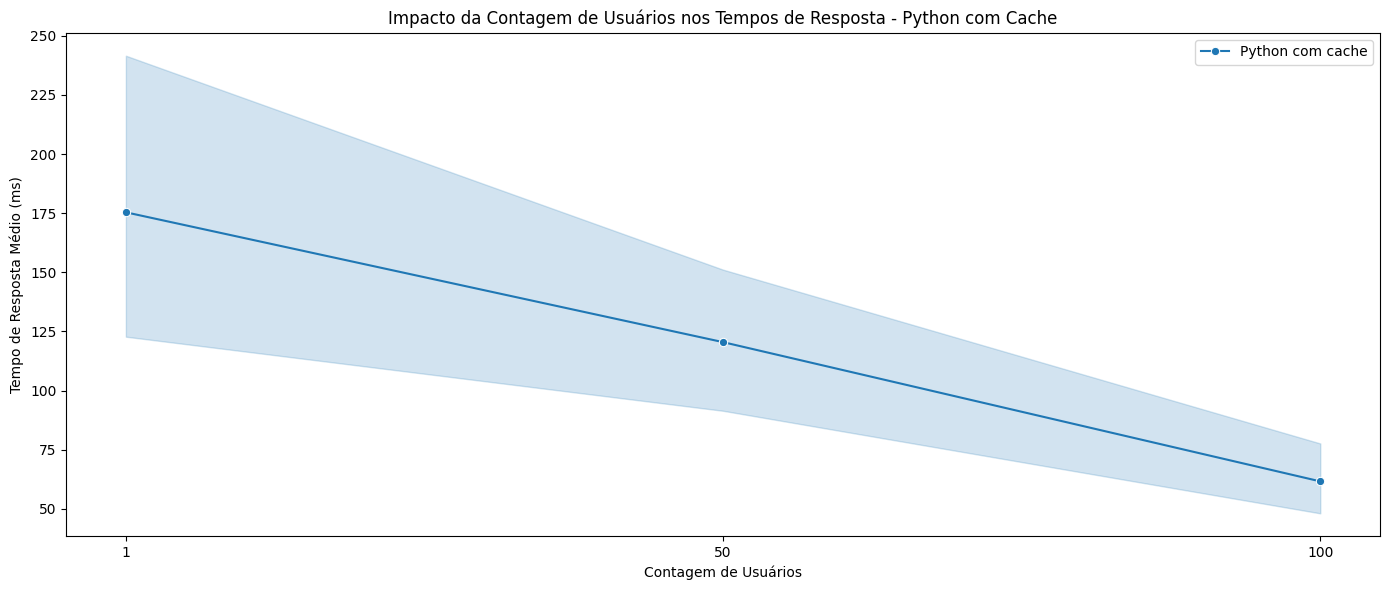

In [89]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='ContagemUsuarios', 
    y='Average Response Time', 
    data=python_cache_data, 
    marker='o',
    label='Python com cache'
)
plt.title('Impacto da Contagem de Usuários nos Tempos de Resposta - Python com Cache')
plt.ylabel('Tempo de Resposta Médio (ms)')
plt.xlabel('Contagem de Usuários')
plt.legend()
plt.tight_layout()
plt.show()

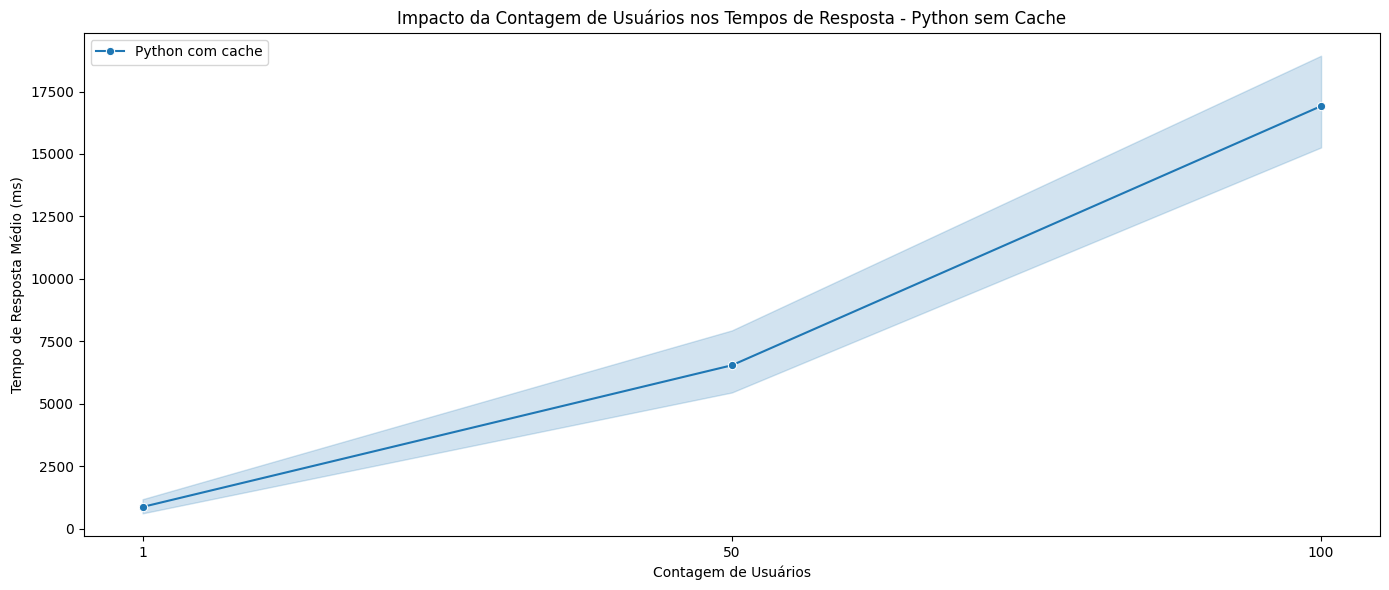

In [90]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='ContagemUsuarios', 
    y='Average Response Time', 
    data=python_no_cache_data, 
    marker='o',
    label='Python com cache'
)
plt.title('Impacto da Contagem de Usuários nos Tempos de Resposta - Python sem Cache')
plt.ylabel('Tempo de Resposta Médio (ms)')
plt.xlabel('Contagem de Usuários')
plt.legend()
plt.tight_layout()
plt.show()

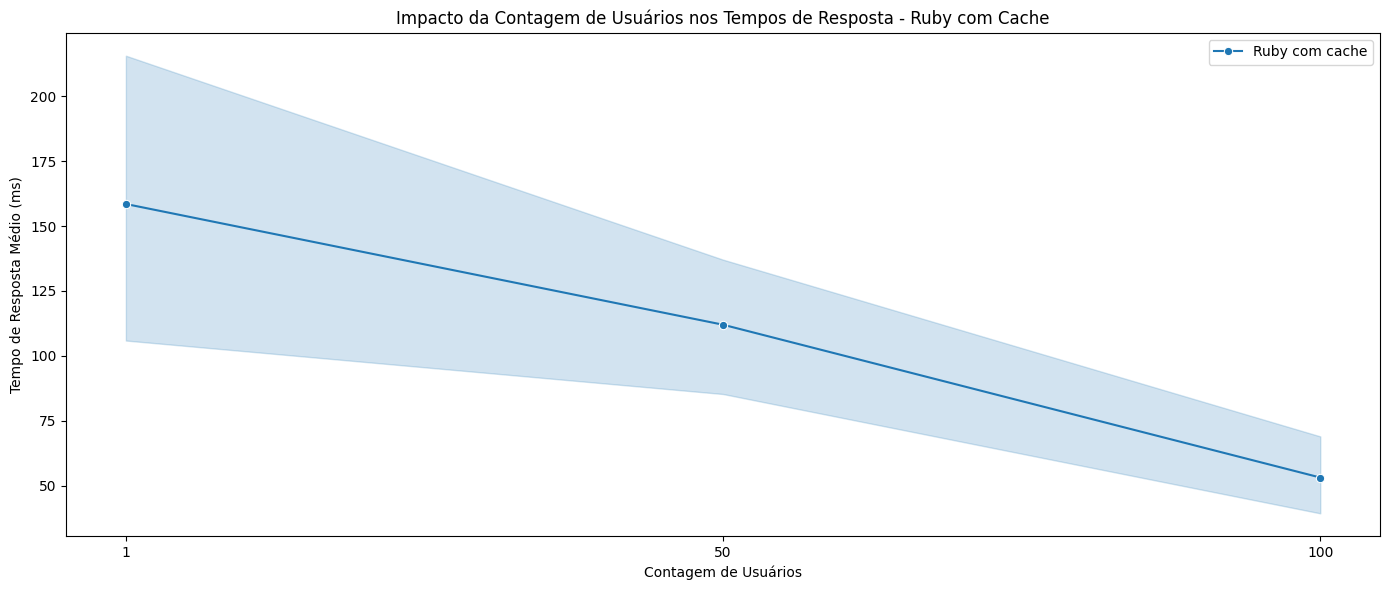

In [91]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='ContagemUsuarios', 
    y='Average Response Time', 
    data=ruby_cache_data, 
    marker='o',
    label='Ruby com cache'
)
plt.title('Impacto da Contagem de Usuários nos Tempos de Resposta - Ruby com Cache')
plt.ylabel('Tempo de Resposta Médio (ms)')
plt.xlabel('Contagem de Usuários')
plt.legend()
plt.tight_layout()
plt.show()

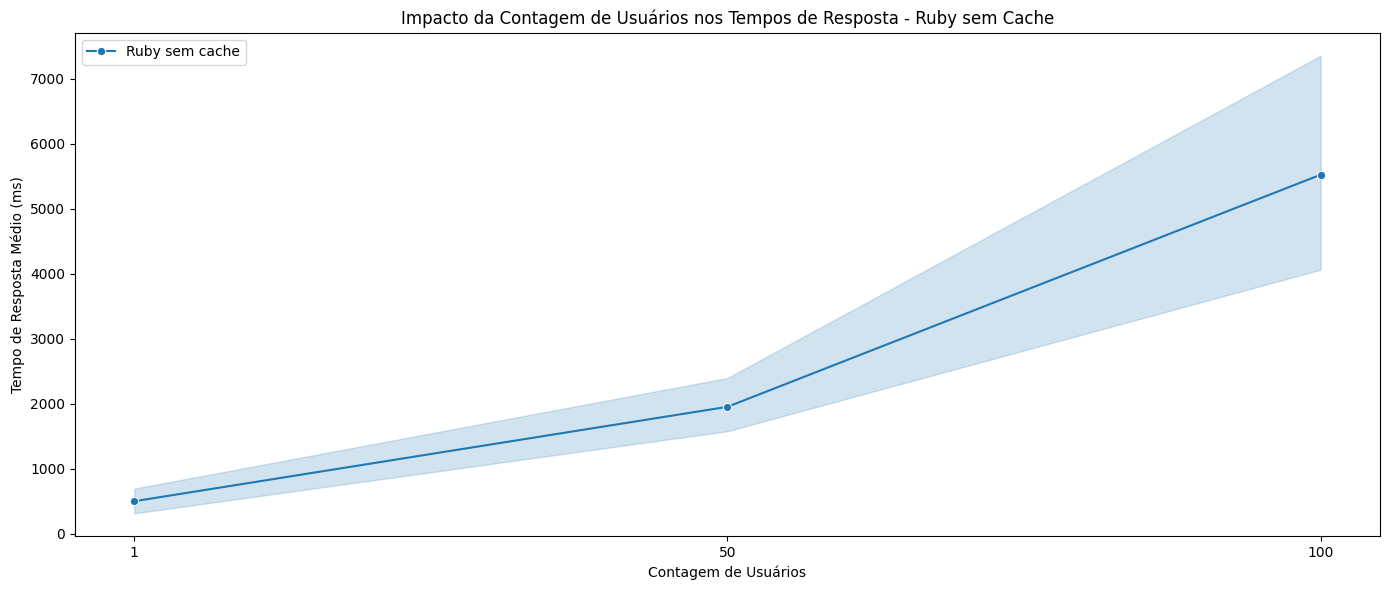

In [92]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='ContagemUsuarios', 
    y='Average Response Time', 
    data=ruby_no_cache_data, 
    marker='o',
    label='Ruby sem cache'
)
plt.title('Impacto da Contagem de Usuários nos Tempos de Resposta - Ruby sem Cache')
plt.ylabel('Tempo de Resposta Médio (ms)')
plt.xlabel('Contagem de Usuários')
plt.legend()
plt.tight_layout()
plt.show()